# Combining Gates and Activation Functions


This function shows how to implement various gates with activation functions in TensorFlow.

This function is an extension of the prior gates, but with various activation functions.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
# Start Graph Session
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [3]:
# Declare the loss function as the difference between
# the output and a target value, 0.75.
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

In [4]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [5]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

In [6]:
# Run loop across gate
print('\nOptimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []
for i in range(500):
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))    
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals}))
    
    if i%50==0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) + ' relu = ' + str(np.mean(relu_output)))
        


Optimizing Sigmoid AND Relu Output to 0.75
sigmoid = 0.126552 relu = 2.02276
sigmoid = 0.178638 relu = 0.75303
sigmoid = 0.247698 relu = 0.74929
sigmoid = 0.344675 relu = 0.749955
sigmoid = 0.440066 relu = 0.754
sigmoid = 0.52369 relu = 0.754772
sigmoid = 0.583739 relu = 0.75087
sigmoid = 0.627335 relu = 0.747023
sigmoid = 0.65495 relu = 0.751805
sigmoid = 0.674526 relu = 0.754707


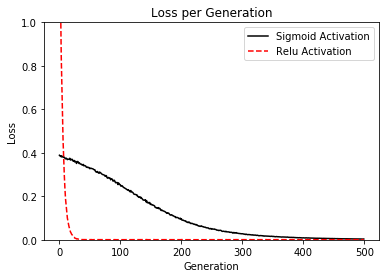

In [7]:
# Plot the loss
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()